# Let’s first ask ten questions we want to dig:

1. What is the distribution of rescued and fatalities?
2. What does the rescue rate have to do with?
3. What is the rescue situation for each passenger class?
4. What is the rescue situation of each gender?
5. What is the rescue situation based on cabin class and gender?
6. What is the rescue situation of passengers at each landing port?
7. What is the rescue situation based on cabin？
8. Verify the effect of SibSp and Parch on survival?
9. The overall rescue situation analysis?
10. What kind of people are the easiest to survive?

In [1]:
# First, we introduce the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [2]:
# Simple analysis of the training set and test set data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print ('Training data set:',train_data.shape,'Test data set:',test_data.shape)

Training data set: (891, 12) Test data set: (418, 11)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Observe the training set data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Observe the test set data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# Try to merge data
full_data = train_data.append(test_data,ignore_index=True)
print('Merged data set：',full_data.shape)

Merged data set： (1309, 12)


In [6]:
# View all data, training set plus test set
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get the description statistics of the data type column
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
# Simple correlation analysis
corrDF = train_data.corr()

corrDF['Survived'].sort_values(ascending =False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

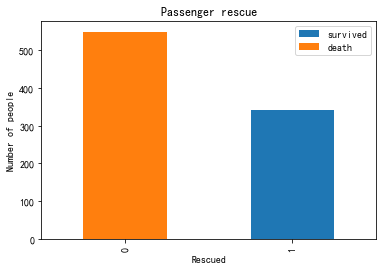

In [10]:
# Passenger rescue
survived = train_data.Survived[train_data.Survived==1].value_counts()
death = train_data.Survived[train_data.Survived==0].value_counts()
df = pd.DataFrame({u'survived':survived,u'death':death})
df.plot(kind = 'bar', stacked = True)
plt.title('Passenger rescue')
plt.xlabel('Rescued')
plt.ylabel('Number of people')
plt.show()

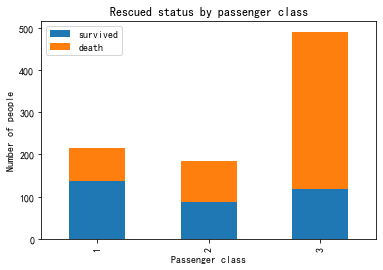

In [11]:
# Rescued status by passenger class
Survived_0 = train_data.Pclass[train_data.Survived == 0].value_counts() # 未获救
Survived_1 = train_data.Pclass[train_data.Survived == 1].value_counts() # 获救
df = pd.DataFrame({u'survived':Survived_1,u'death':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title('Rescued status by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Number of people')
plt.show()

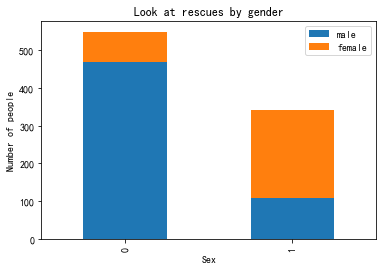

In [12]:
# Observe rescues based on gender
Survived_m = train_data.Survived[train_data.Sex == 'male'].value_counts()
Survived_f = train_data.Survived[train_data.Sex == 'female'].value_counts()
df = pd.DataFrame({u'male':Survived_m,u'female':Survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title(u'Look at rescues by gender')
plt.xlabel(u'Sex')
plt.ylabel(u'Number of people')
plt.show()

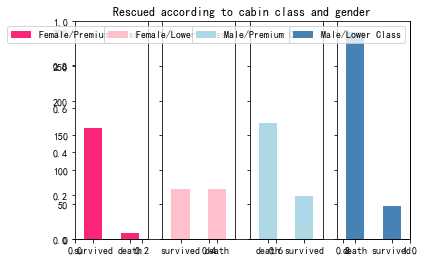

In [16]:
# Rescued according to cabin class and gender (the first and second classes are high-class cabins, and the third class is low-class cabins)
fig = plt.figure()
plt.title(u'Rescued according to cabin class and gender')

ax1 = fig.add_subplot(141) # 将图像分为1行4列，从左到右从上到下的第1块
train_data.Survived[train_data.Sex == 'female'][train_data.Pclass != 3].value_counts().plot(kind = 'bar', label = 'female high class', color = '#FA2479')
ax1.set_xticklabels([u'survived',u'death'], rotation = 0) # 根据实际填写标签
ax1.legend([u'Female/Premium Class'], loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1) # 将图像分为1行4列，从左到右从上到下的第2块
train_data.Survived[train_data.Sex == 'female'][train_data.Pclass == 3].value_counts().plot(kind = 'bar', label = 'female low class', color = 'pink')
ax2.set_xticklabels([u"survived", u"death"], rotation=0)
plt.legend([u"Female/Lower Class"], loc='best')

ax3 = fig.add_subplot(143, sharey = ax1)
train_data.Survived[train_data.Sex == 'male'][train_data.Pclass != 3].value_counts().plot(kind = 'bar', label = 'male high class', color = 'lightblue')
ax3.set_xticklabels([u'death',u'survived'], rotation = 0)
plt.legend([u'Male/Premium Class'], loc = 'best')

ax4 = fig.add_subplot(144, sharey = ax1)
train_data.Survived[train_data.Sex == 'male'][train_data.Pclass == 3].value_counts().plot(kind = 'bar', label = 'male low class', color = 'steelblue')
ax4.set_xticklabels([u'death',u'survived'], rotation = 0)
plt.legend([u'Male/Lower Class'], loc = 'best')
plt.show()

很明显高级舱女性的生还率高于低级舱，低级舱男性的死亡率高于高级舱。在四种情况中，高级舱女性的生还率最高，低级舱男性的死亡率最高。

<Figure size 432x288 with 0 Axes>

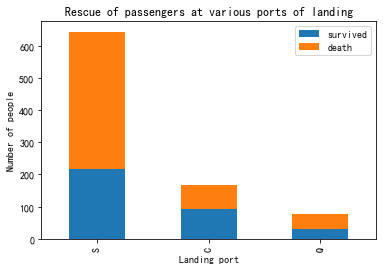

In [18]:
# Rescue of passengers at various ports of landing
fig = plt.figure()
fig.set(alpha = 0.2)
Survived_0 = train_data.Embarked[train_data.Survived == 0].value_counts()
Survived_1 = train_data.Embarked[train_data.Survived == 1].value_counts()
df = pd.DataFrame({u'survived':Survived_1,u'death':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'Rescue of passengers at various ports of landing')
plt.xlabel(u'Landing port')
plt.ylabel(u'Number of people')
plt.show()

### According to the picture above, the relationship between the rescued situation and the port of embarkation is not strong. The rescue rate in Port C is higher.

In [19]:
# How many cousins/sisters, children/parents are there, and their impact on rescue
g = train_data.groupby(['SibSp','Survived']) # Data grouping
df = pd.DataFrame(g.count()['PassengerId'])
print (df)
g = train_data.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


<Figure size 432x288 with 0 Axes>

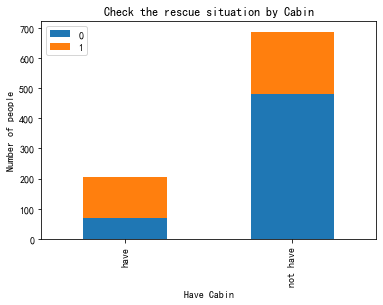

In [20]:
# Check the rescue situation by Cabin
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_cabin = train_data.Survived[pd.notnull(train_data.Cabin)].value_counts()
Survived_nocabin = train_data.Survived[pd.isnull(train_data.Cabin)].value_counts()
df = pd.DataFrame({u'have':Survived_cabin, u'not have':Survived_nocabin}).transpose()
df.plot(kind = 'bar', stacked = True)
plt.title(u'Check the rescue situation by Cabin')
plt.xlabel(u'Have Cabin')
plt.ylabel(u'Number of people')
plt.show()

### The rescue situation with cabin information is higher. However, the situation is complicated. For example, if the survivors go ashore and carry out information statistics, it will affect whether the information is related to the rescue situation.

In [21]:
# Verify the impact of the two eigenvalues of SibSp and Parch on inventory
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()\
.sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


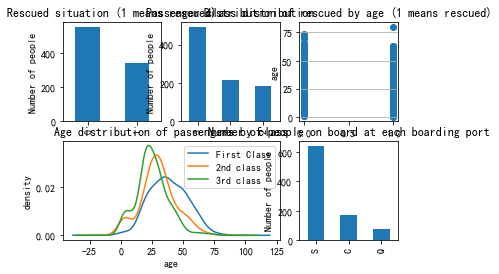

In [26]:
# Summary data
plt.rcParams['font.sans-serif']=['SimHei']

fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
train_data.Survived.value_counts().plot(kind='bar')
plt.title(u'Rescued situation (1 means rescued)')
plt.ylabel(u"Number of people")

plt.subplot2grid((2,3),(0,1))
train_data.Pclass.value_counts().plot(kind='bar')
plt.title(u"Passenger class distribution")
plt.ylabel(u"Number of people")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_data.Survived,train_data.Age)
plt.ylabel(u"age")
plt.grid(b=True,which='major',axis='y')
plt.title(u"Distribution of rescued by age (1 means rescued)")

plt.subplot2grid((2,3),(1,0),colspan=2)
train_data.Age[train_data.Pclass==1].plot(kind='kde')
train_data.Age[train_data.Pclass==2].plot(kind='kde')
train_data.Age[train_data.Pclass==3].plot(kind='kde')
plt.xlabel(u"age")
plt.ylabel(u"density")
plt.title(u"Age distribution of passengers by class")
plt.legend((u'First Class', u'2nd class',u'3rd class'),loc='best') 

plt.subplot2grid((2,3),(1,2))
train_data.Embarked.value_counts().plot(kind='bar')
plt.title(u"Number of people on board at each boarding port")
plt.ylabel(u"Number of people")

plt.show()

### It can be seen that passengers in the upper class and passengers with female gender are more likely to survive.